## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
COmbined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
COmbined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
#COmbined_df['Mouse ID'].unique()
len(COmbined_df['Mouse ID'].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = COmbined_df[COmbined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_df

#dup_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [2]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df_clean = COmbined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='first')
combined_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
len(combined_df_clean['Mouse ID'].unique())

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_regimine_df= combined_df_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std','sem'])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

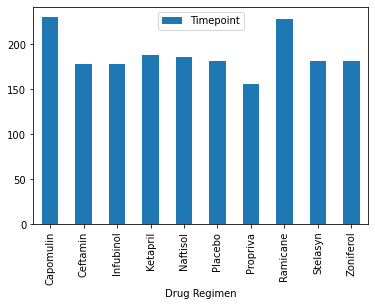

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_time_df=combined_df_clean.groupby('Drug Regimen')['Timepoint'].count().reset_index()
mouse_time_df.plot(x="Drug Regimen",kind = 'bar')


<BarContainer object of 10 artists>

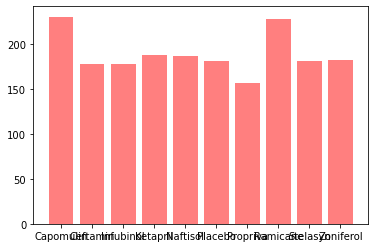

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mouse_time_df['Drug Regimen'], mouse_time_df['Timepoint'], color='r', alpha=0.5, align="center")


In [33]:
combined_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<AxesSubplot:ylabel='Mouse ID'>

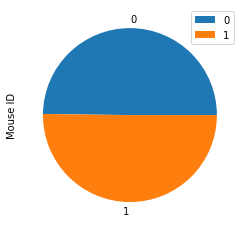

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_df_unique = combined_df_clean.drop_duplicates(subset=['Mouse ID'],keep='first')
mouse_sex_df=combined_df_unique.groupby(['Sex'])['Mouse ID'].count().reset_index()
mouse_sex_df
mouse_sex_df.plot(x="Sex", y='Mouse ID',kind = 'pie')


([<matplotlib.patches.Wedge at 0x22add0a8ee0>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')])

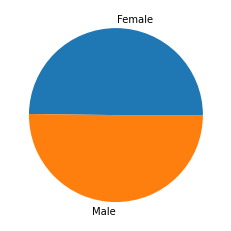

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_df['Sex']=pd.Categorical(mouse_sex_df['Sex'])
plt.pie(mouse_sex_df['Mouse ID'],labels=mouse_sex_df['Sex'])


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#df_filtered = df[df['Col1'].isin(allowed_values)]
combined_df_filtered = combined_df_clean[combined_df_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
combined_df_filtered


# Start by getting the last (greatest) timepoint for each mouse
mouse_time_df = combined_df_filtered.groupby("Mouse ID")["Timepoint"].max().reset_index()
combined_df_filtered = pd.merge(combined_df_filtered, mouse_time_df, on='Mouse ID')
combined_df_filtered


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df_filtered=combined_df_filtered.drop_duplicates(['Mouse ID', 'Timepoint_y'],keep = 'last')
combined_df_filtered


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
773,x822,Ceftamin,Male,3,29,45,61.386660,3,45
783,y163,Infubinol,Female,17,27,45,67.685569,3,45
793,y769,Ceftamin,Female,6,27,45,68.594745,4,45
803,y865,Ceftamin,Male,23,26,45,64.729837,3,45


0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64 37.1877438025 59.930261755 22.742517952499995
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
Capomulin 7.781863460000004


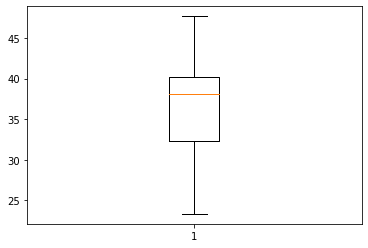

Ramicane 9.098536719999998


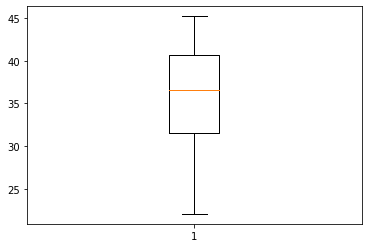

Infubinol 11.477135160000003


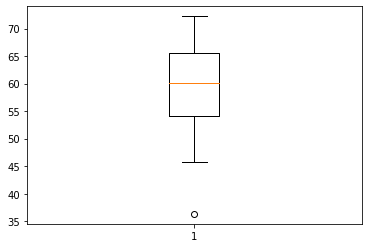

Ceftamin 15.577752179999997


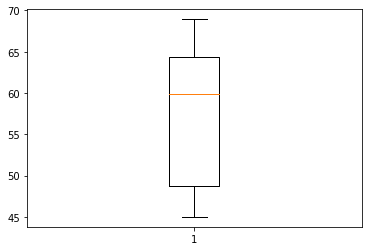

In [40]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined_df_filtered['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(quartiles, lowerq, upperq, iqr)

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in drug_list:
    temp_data = combined_df_filtered[combined_df_filtered["Drug Regimen"]==i]
    quartiles = temp_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'{i} {iqr}')
    
    # add subset 
    fig1, ax1 = plt.subplots()
    ax1.boxplot(temp_data['Tumor Volume (mm3)'])
    plt.show()
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

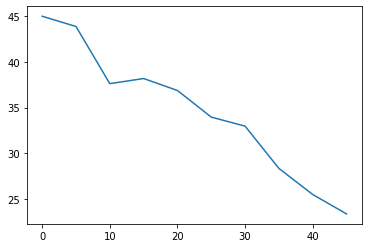

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = combined_df_clean[combined_df_clean["Drug Regimen"]=='Capomulin']
cap_df = cap_df[cap_df["Mouse ID"]=='s185']
cap_df
plt.plot(cap_df['Timepoint'],cap_df['Tumor Volume (mm3)'])

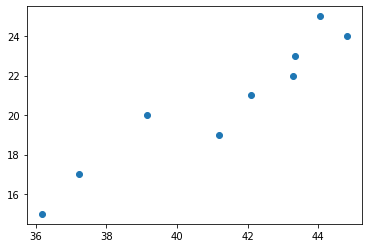

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = combined_df_clean[combined_df_clean["Drug Regimen"]=='Capomulin']
cap_df = cap_df.groupby("Weight (g)")['Tumor Volume (mm3)'].mean().reset_index()
plt.scatter(cap_df['Tumor Volume (mm3)'],cap_df['Weight (g)'])

## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
 # The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"

correlation = st.pearsonr(cap_df['Tumor Volume (mm3)'],cap_df['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.95
